In [1]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

In [2]:
startyear = 2019
lifecycle = 30

## 0.1 Generate demand forecast scenario

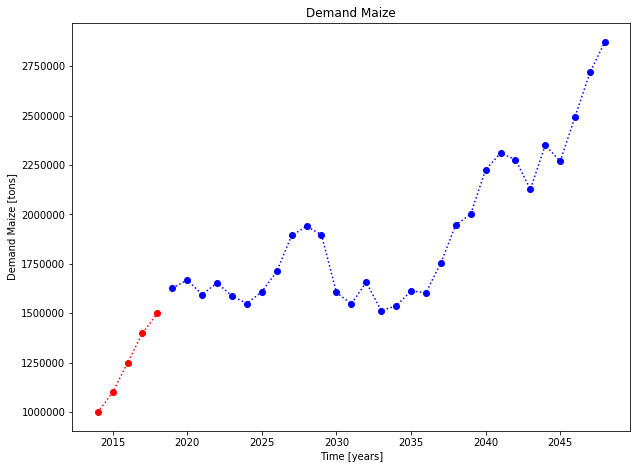

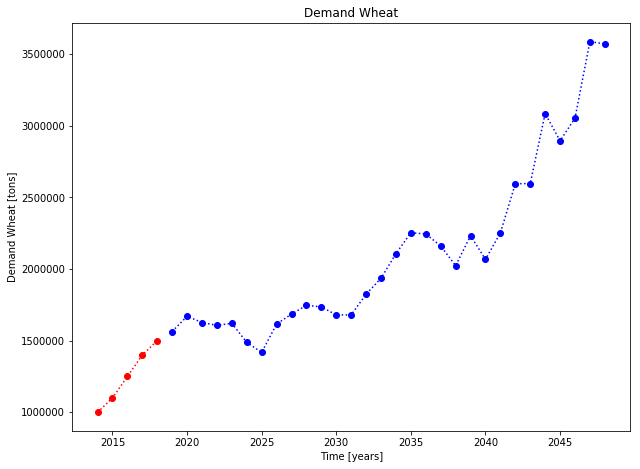

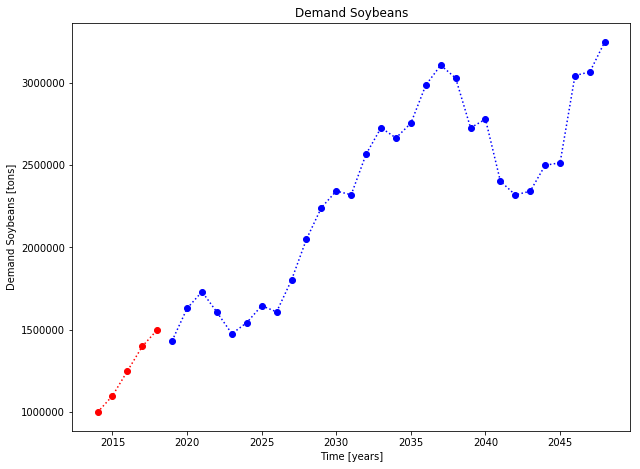

In [3]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random(startyear = startyear, lifecycle = lifecycle)
wheat.scenario_random(startyear = startyear, lifecycle = lifecycle)
soybeans.scenario_random(startyear = startyear, lifecycle = lifecycle)

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

In [4]:
maize.handling_fee = 3
soybeans.handling_fee = 3
wheat.handling_fee = 3

## 0.2 Generate vessels

In [5]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [6]:
Terminal = system.System(startyear = startyear, lifecycle = lifecycle, elements = demand + vessels, debug=True,
                         crane_type_defaults=defaults.mobile_crane_data, storage_type_defaults=defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [7]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 100
     Handysize calls: 44
     Handymax calls: 31
     Panamax calls: 25
  Total cargo volume: 4625142
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
2019
44
31
25
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy pla

a total of 0 ton of storage capacity is online; 105000 ton total planned
  *** add storage to elements
a total of 0 ton of storage capacity is online; 110000 ton total planned
  *** add storage to elements
a total of 0 ton of storage capacity is online; 115000 ton total planned
  *** add storage to elements
a total of 0 ton of storage capacity is online; 120000 ton total planned
  *** add storage to elements
a total of 0 ton of storage capacity is online; 125000 ton total planned
  *** add storage to elements
a total of 0 ton of storage capacity is online; 130000 ton total planned
  *** add storage to elements
a total of 0 ton of storage capacity is online; 135000 ton total planned
  *** add storage to elements
a total of 0 ton of storage capacity is online; 140000 ton total planned
  *** add storage to elements
a total of 0 ton of storage capacity is online; 145000 ton total planned
  *** add storage to elements
a total of 0 ton of storage capacity is online; 150000 ton total planned


NameError: name 'service_capacity_online' is not defined

## Report all elements

In [ ]:
if Terminal.debug:
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

In [ ]:
Terminal.terminal_elements_plot()

In [ ]:
Terminal.terminal_capacity_plot()

In [ ]:
Terminal.cashflow_plot()

## SandBox

In [ ]:
Terminal.NPV()

## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [ ]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [crane, screw],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)

In [ ]:
Terminal.plot_system()